In [10]:
import argparse
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [27]:
g = nx.read_gpickle("../tmp/condition_multigraph.nxp")
g

In [28]:
interaction_entropies = dict()
fitness_entropies = dict()

for u in g.adj:
    by_condition = {}
    all_partners = []
    for v in g.adj[u]:
        all_partners.append(v)
        datar = g.get_edge_data(u,v)
        for id,each_edge in datar.items():
            try:
                by_condition[each_edge['condition']].append(float(each_edge['fitness']))
            except:
                by_condition[each_edge['condition']] = [float(each_edge['fitness'])]
    max_interactions = 0
    max_fitness_sum = 0
    for condition in by_condition:
        if len(by_condition[condition]) > max_interactions:
            max_interactions = len(by_condition[condition])
        if np.sum(by_condition[condition]) > max_fitness_sum:
            max_fitness_sum = np.sum(by_condition[condition])
    interaction_entropy = 0
    for condition in by_condition:
        frac = len(by_condition[condition]) / max_interactions
        interaction_entropy += -frac*np.log2(frac)
    interaction_entropies[u] = interaction_entropy
    fitness_entropy = 0
    for condition in by_condition:
        frac = np.sum(by_condition[condition]) / max_fitness_sum
        fitness_entropy += -frac*np.log2(frac)
    fitness_entropies[u] = fitness_entropy

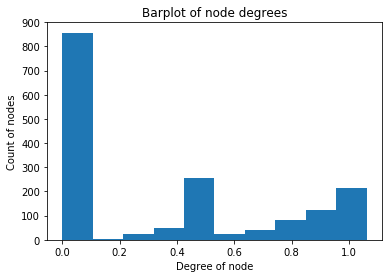

In [29]:
hist = plt.figure()
plt.hist([i for k,i in interaction_entropies.items()])
#plt.semilogx()
plt.title("Barplot of node degrees")
plt.ylabel("Count of nodes")
plt.xlabel("Degree of node")
hist.show()
hist.savefig("../tmp/interaction_entropies_hist.png")

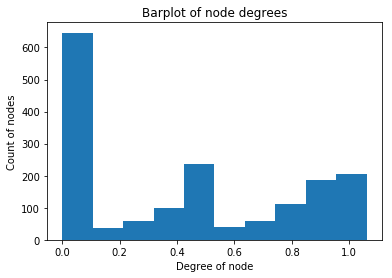

In [30]:
hist = plt.figure()
plt.hist([i for k,i in fitness_entropies.items()])
#plt.semilogx()
plt.title("Barplot of node degrees")
plt.ylabel("Count of nodes")
plt.xlabel("Degree of node")
hist.show()
hist.savefig("../tmp/interaction_entropies_hist.png")

In [ ]:
pos = nx.layout.kamada_kawai_layout(g)

In [ ]:
plt.figure(figsize=(16, 16))
nodes = nx.draw_networkx_nodes(g, pos, node_size=0.1, node_color=[i for k,i in interaction_entropies.items()])
edges = nx.draw_networkx_edges(g, pos, node_size=0.1, width=0.1)
plt.show()

In [ ]:
plt.figure(figsize=(16, 16))
nodes = nx.draw_networkx_nodes(g, pos, node_size=0.1, node_color=[i for k,i in fitness_entropies.items()])
edges = nx.draw_networkx_edges(g, pos, node_size=0.1, width=0.1)
plt.show()